In [90]:
# https://nssdc.gsfc.nasa.gov/planetary/planetfact.html
# https://plotly.com/python/animations/

import pandas
import pathlib
import re
# import numpy as np
import plotly.graph_objects as go
import plotly.express as px
# import datetime
import matplotlib.pyplot as plt
# from matplotlib import animation
# import json
# from typing import Tuple

pandas.options.plotting.backend = "plotly"

cwd = pathlib.Path.cwd()

# It can take a while to output the animation, and these files can be quit large (75 years created a 123 mb file and took about 30 minutes to produce)
# They output to an html file that can be opened by any internet browser. They can also take a while to open because of their size, and might slow the browser down.
output_animation = True
output_animation_filename = "Voyager.html"



In [91]:
c_data = pandas.read_csv(str(cwd / "Orbit_Table.csv"), header = 0)
c_data = c_data.set_index("N")

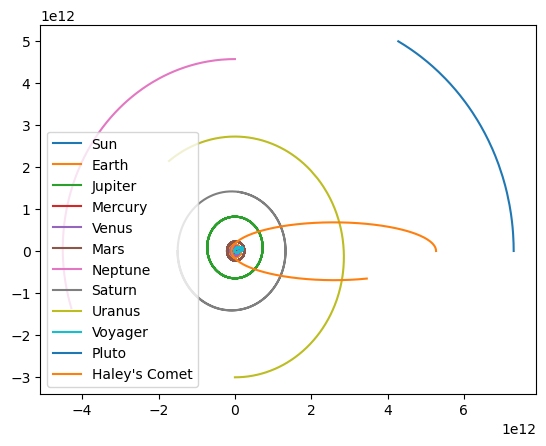

In [92]:
bodies = tuple(c_data.columns)
for c in range(int(c_data.shape[1] / 2)):
    x_data = c_data.iloc[:, 2*c]
    y_data = c_data.iloc[:, 2*c + 1]
    # print(re.split("_", bodies[2*c])[0])
    plt.plot(x_data, y_data, label = re.split("_", bodies[2*c])[0])

plt.legend()
# plt.title("Static Picture of Oribts")
plt.show()
# plt.savefig("")


In [93]:


planet_data = pandas.DataFrame(columns=["n", "x", "y", "body"])
for c in range(int(c_data.shape[1] / 2)):
    x_data = c_data.iloc[:, 2*c].rename("x")
    y_data = c_data.iloc[:, 2*c + 1].rename("y")
    b_cat = pandas.Series([re.split("_", bodies[2*c])[0] for _ in range(x_data.shape[0])]).rename("body")
    n_frames = pandas.Series([n for n in range(x_data.shape[0])]).rename("n")

    local_data = pandas.concat([n_frames, x_data, y_data.to_frame(), b_cat], axis = 1)
    planet_data = pandas.concat([planet_data, local_data])

planet_data = planet_data.reset_index()
planet_data.pop("index")


0             0
1             1
2             2
3             3
4             4
          ...  
148567    12376
148568    12377
148569    12378
148570    12379
148571    12380
Name: index, Length: 148572, dtype: int64

For animations: uses Plotly.
This might take awhile depending on size of csv file, hence the if statement to activate.

In [94]:
if output_animation:

    miliseconds = 5


    fig = px.scatter(planet_data, x = "x", y = "y", color = "body", animation_frame = "n", animation_group = "body", labels = "body")

    for body in planet_data["body"].unique():
        body_data = planet_data[planet_data["body"] == body]

        fig.add_trace(go.Scatter(x = body_data["x"], y = body_data["y"], mode = "lines", line = dict(color = "black", width = 0.5), showlegend = False))
    # fig.add_trace(px.line(planet_data, x = "x", y = "y", color = "body"))
    # fig.update_traces(line = dict(width = 0.5))

    fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = miliseconds
    fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 5
    fig.write_html(str(cwd / output_animation_filename))
    # print("something")


This part is for specific plot designs: pngs, pdfs, titles, etc.

In [95]:
# bodies = tuple(c_data.columns)
# for c in range(int(c_data.shape[1] / 2)):
#     x_data = c_data.iloc[:, 2*c]
#     y_data = c_data.iloc[:, 2*c + 1]
#     # print(re.split("_", bodies[2*c])[0])
#     plt.plot(x_data, y_data, label = re.split("_", bodies[2*c])[0])

# # plt.legend()
# ax = plt.gca()
# ax.get_xaxis().set_visible(False)
# ax.get_yaxis().set_visible(False)
# plt.title("150 Year Oribt")
# plt.show()
# plt.savefig("150YearOribt.pdf")